# Business Problem- 
## Bob, the owner of a new mobile phone company wanted to strategically position his products to compete against established brands like Samsung and Apple. He collected sales data from various companies to focus on the critical features like RAM, internal memory and more to be able to achieve this. The main aim is to determine the best selling price of his mobile from using the data and predicting it. With this analysis Bob would be able to make proper data driven decisions and ensure the products are rightly priced and also meet consumer expectations. 

In [2]:
!pip install catboost
import pandas as pd
import numpy as np

   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/101.1 MB 650.2 kB/s eta 0:02:36
   ---------------------------------------- 0.1/101.1 MB 1.1 MB/s eta 0:01:30
   ---------------------------------------- 0.4/101.1 MB 2.1 MB/s eta 0:00:48
   ---------------------------------------- 0.8/101.1 MB 3.6 MB/s eta 0:00:28
    --------------------------------------- 1.7/101.1 MB 6.5 MB/s eta 0:00:16
   - -------------------------------------- 3.0/101.1 MB 10.1 MB/s eta 0:00:10
   - -------------------------------------- 3.1/101.1 MB 9.6 MB/s eta 0:00:11
   - -------------------------------------- 3.1/101.1 MB 9.6 MB/s eta 0:00:11
   - -------------------------------------- 3.1/101.1 MB 9.6 MB/s eta 0:00:11
   - -------------------------------------- 4.3/101.1 MB 8.6 MB/s eta 0:00:12
   -- ------------------------------------- 6.7/101.1 MB 12.3 MB/s eta 0:00

In [6]:
df=pd.read_csv("C://Users//Tiny_//Downloads//ML Assignment//train.csv")

In [5]:
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


# Finding Missing Values

In [6]:
df.isna( ).sum( )

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
df.shape

(2000, 21)

# Scaling

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
ss=StandardScaler( )

In [11]:
df['battery_power']=ss.fit_transform(df[['battery_power']])
df['int_memory']=ss.fit_transform(df[['int_memory']])
df['mobile_wt']=ss.fit_transform(df[['mobile_wt']])
df['int_memory']=ss.fit_transform(df[['int_memory']])
df['px_height']=ss.fit_transform(df[['px_height']])
df['px_width']=ss.fit_transform(df[['px_width']])
df['ram']=ss.fit_transform(df[['ram']])

In [12]:
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.902597,0,2.2,0,1,0,-1.380644,0.6,1.349249,2,...,-1.408949,-1.146784,0.391703,9,7,19,0,0,1,1
1,-0.495139,1,0.5,1,0,1,1.155024,0.7,-0.120059,3,...,0.585778,1.704465,0.467317,17,3,7,1,1,0,2
2,-1.537686,1,0.5,1,2,1,0.493546,0.9,0.134244,5,...,1.392684,1.074968,0.441498,11,2,9,1,1,0,2
3,-1.419319,1,2.5,0,0,0,-1.215274,0.8,-0.261339,6,...,1.286750,1.236971,0.594569,16,8,11,1,0,0,2
4,1.325906,1,1.2,0,13,1,0.658915,0.6,0.021220,2,...,1.268718,-0.091452,-0.657666,8,2,15,1,1,0,1
5,1.412405,0,0.5,1,3,0,-0.553795,0.7,0.671107,1,...,0.808917,0.931480,-0.974874,17,1,10,1,0,0,1
6,1.325906,0,1.7,0,4,1,-1.215274,0.8,-0.035292,8,...,-0.595280,-0.540431,1.010444,13,8,18,1,0,1,3
7,1.628654,0,0.5,1,0,0,-0.443549,0.8,1.320993,4,...,-0.300016,-0.237254,-1.313291,16,3,5,1,1,1,0
8,0.470015,1,0.5,0,0,0,1.155024,0.7,0.953666,7,...,-0.584011,-0.961638,-0.945367,17,1,20,1,0,0,0
9,-1.660607,1,0.6,1,2,1,-1.270397,0.1,-1.335064,5,...,1.108689,-0.063680,-1.485727,19,10,12,1,0,0,0


In [13]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

# Training and Testing

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x=df[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g','int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g','touch_screen', 'wifi']]
y=df['price_range']

In [16]:
X_Train,X_Test, Y_Train,Y_Test= train_test_split(x,y,test_size=0.3)

# Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier as dtree

In [18]:
dt=dtree( )

In [19]:
dt.fit(X_Train,Y_Train)

DecisionTreeClassifier()

In [20]:
Y_Pred1 = dt.predict(X_Test)

# Calculating Performance for Decision Tree

In [21]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score

In [22]:
accuracy_score(Y_Test,Y_Pred1)

0.8166666666666667

In [23]:
precision_score(Y_Test, Y_Pred1, average='micro')

0.8166666666666667

In [24]:
recall_score(Y_Test, Y_Pred1, average='micro')

0.8166666666666667

In [25]:
f1_score(Y_Test, Y_Pred1, average='micro')

0.8166666666666667

# Feature Importance

In [26]:
feature_imp = pd.Series(dt.feature_importances_,index=X_Train.columns).sort_values(ascending=False)
feature_imp

ram              0.581946
battery_power    0.160220
px_height        0.084432
px_width         0.083775
mobile_wt        0.012568
sc_h             0.011494
talk_time        0.011375
pc               0.009939
four_g           0.008530
fc               0.006251
clock_speed      0.006243
n_cores          0.006042
m_dep            0.004671
sc_w             0.004654
wifi             0.003654
int_memory       0.003253
dual_sim         0.000953
blue             0.000000
three_g          0.000000
touch_screen     0.000000
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


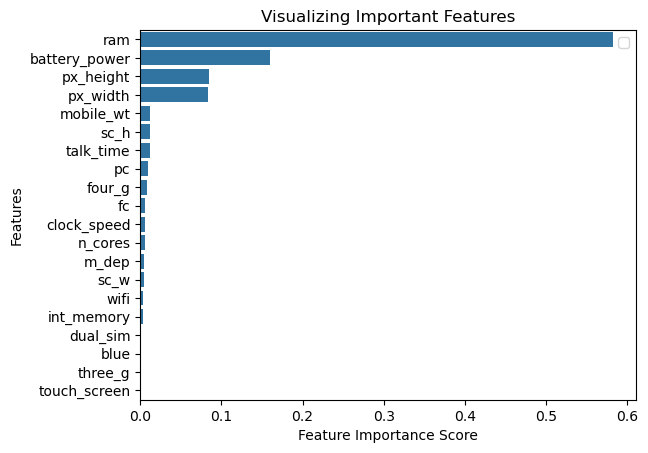

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# Decision Tree upto depth of 3

[Text(0.5, 0.875, 'node #0\nram <= 0.099\ngini = 0.749\nsamples = 1400\nvalue = [328, 370, 365, 337]\nclass = 1'),
 Text(0.25, 0.625, 'node #1\nram <= -0.939\ngini = 0.592\nsamples = 735\nvalue = [328, 326, 81, 0]\nclass = 0'),
 Text(0.125, 0.375, 'node #2\npx_width <= 0.778\ngini = 0.219\nsamples = 296\nvalue = [259, 37, 0, 0]\nclass = 0'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'node #43\nram <= -0.568\ngini = 0.508\nsamples = 439\nvalue = [69, 289, 81, 0]\nclass = 1'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'node #142\nram <= 0.921\ngini = 0.556\nsamples = 665\nvalue = [0.0, 44.0, 284.0, 337.0]\nclass = 3'),
 Text(0.625, 0.375, 'node #143\nbattery_power <= 0.943\ngini = 0.47\nsamples = 337\nvalue = [0.0, 44.0, 234.0, 59.0]\nclass = 2'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'node #234\nbattery_power <= -1.348

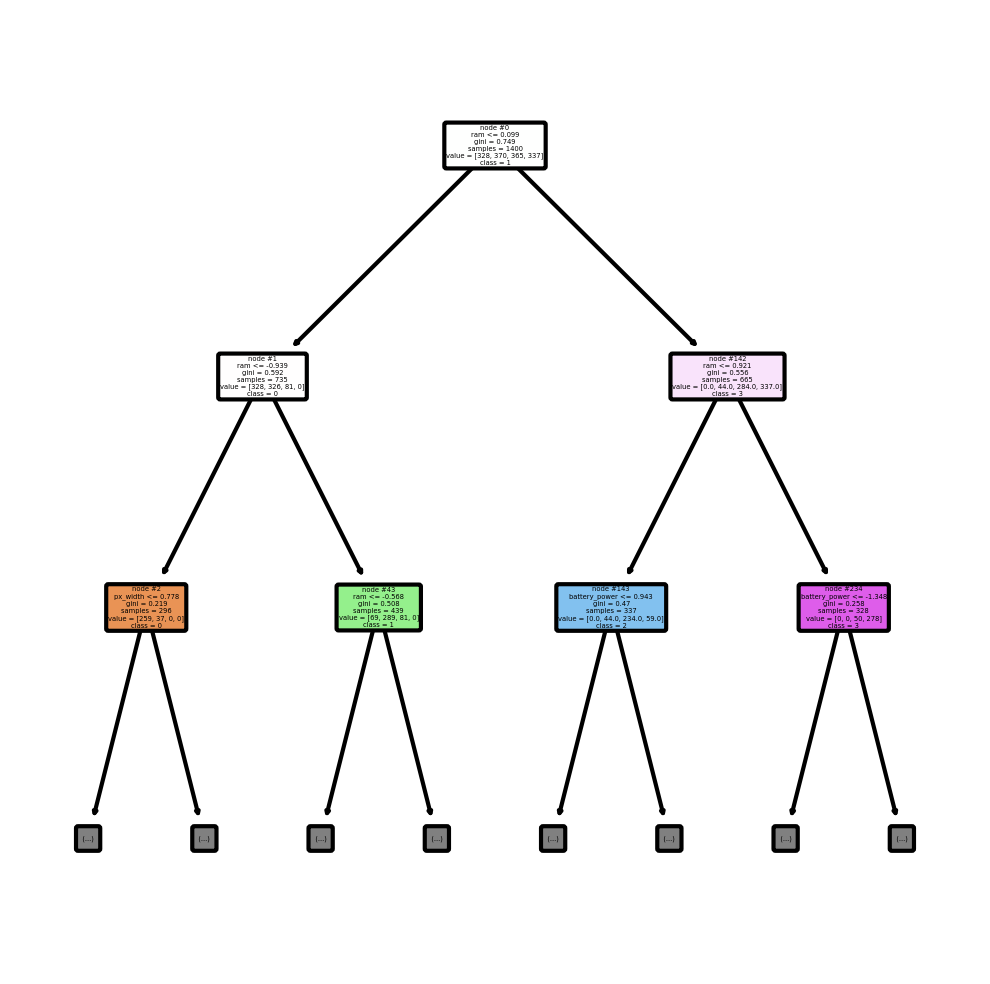

In [28]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1, ncols= 1, figsize = (4,4), dpi = 300)

tree.plot_tree(dt, max_depth= 2,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g','int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g','touch_screen', 'wifi', 'price_range'],
            class_names = ["0","1","2","3"]
              )

# CatBoost

In [29]:
from catboost import CatBoostClassifier

In [30]:
cat = CatBoostClassifier()

In [31]:
cat.fit(X_Train,Y_Train)

Learning rate set to 0.080496
0:	learn: 1.2618014	total: 727ms	remaining: 12m 5s
1:	learn: 1.1704709	total: 838ms	remaining: 6m 58s
2:	learn: 1.0981613	total: 901ms	remaining: 4m 59s
3:	learn: 1.0265591	total: 1.36s	remaining: 5m 37s
4:	learn: 0.9595240	total: 2.25s	remaining: 7m 27s
5:	learn: 0.9014284	total: 2.31s	remaining: 6m 23s
6:	learn: 0.8513199	total: 2.42s	remaining: 5m 43s
7:	learn: 0.8154759	total: 2.45s	remaining: 5m 3s
8:	learn: 0.7730166	total: 2.49s	remaining: 4m 34s
9:	learn: 0.7430678	total: 2.54s	remaining: 4m 11s
10:	learn: 0.7153938	total: 2.58s	remaining: 3m 51s
11:	learn: 0.6890403	total: 2.61s	remaining: 3m 34s
12:	learn: 0.6655720	total: 2.62s	remaining: 3m 19s
13:	learn: 0.6405725	total: 2.64s	remaining: 3m 5s
14:	learn: 0.6120156	total: 2.65s	remaining: 2m 53s
15:	learn: 0.5897439	total: 2.66s	remaining: 2m 43s
16:	learn: 0.5723660	total: 2.67s	remaining: 2m 34s
17:	learn: 0.5563274	total: 2.69s	remaining: 2m 26s
18:	learn: 0.5404715	total: 2.7s	remaining: 2m

In [32]:
Y_Pred2 = cat.predict(X_Test)

# Calculating Performance for CatBoost

In [33]:
accuracy_score(Y_Test,Y_Pred2)

0.9116666666666666

In [34]:
precision_score(Y_Test, Y_Pred2, average='micro')

0.9116666666666666

In [35]:
recall_score(Y_Test, Y_Pred2, average='micro')

0.9116666666666666

In [36]:
f1_score(Y_Test, Y_Pred1, average='micro')

0.8166666666666667

# Testing on New Data

In [37]:
new_test_data=pd.read_csv("C://Users//Tiny_//Downloads//ML Assignment//test.csv")

In [38]:
new_test_data.drop(['id'], axis=1, inplace=True)

In [39]:
new_test_data['battery_power']=ss.fit_transform(new_test_data[['battery_power']])
new_test_data['int_memory']=ss.fit_transform(new_test_data[['int_memory']])
new_test_data['mobile_wt']=ss.fit_transform(new_test_data[['mobile_wt']])
new_test_data['int_memory']=ss.fit_transform(new_test_data[['int_memory']])
new_test_data['px_height']=ss.fit_transform(new_test_data[['px_height']])
new_test_data['px_width']=ss.fit_transform(new_test_data[['px_width']])
new_test_data['ram']=ss.fit_transform(new_test_data[['ram']])

In [40]:
dt.predict(new_test_data)

array([3, 3, 3, 2, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 1, 2, 1, 3, 2, 0, 2,
       1, 1, 3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 1, 3, 2, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 2, 3, 2, 0, 1, 1, 1,
       1, 2, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 2, 0, 2, 1, 0, 2, 1, 2, 1, 0, 0, 2, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 1, 1, 1, 1, 3, 2, 2, 2, 0, 2,
       1, 1, 2, 1, 2, 0, 3, 1, 1, 2, 1, 2, 2, 3, 3, 3, 2, 3, 3, 3, 0, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 2,
       1, 1, 1, 3, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 2, 1, 2, 2,
       2, 3, 1, 2, 3, 3, 3, 2, 2, 1, 0, 1, 1, 3, 0, 2, 3, 3, 0, 2, 0, 2,
       2, 3, 3, 0, 0, 1, 0, 3, 0, 1, 1, 2, 2, 1, 3, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 2, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 3, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [96]:
print("accuracy_score_for_Decision_tree:", accuracy_score(Y_Test, Y_Pred1))
print("precision_score_for_Decision_tree:", precision_score(Y_Test, Y_Pred1, average='macro'))
print("recall_score_for_Decision_tree:", recall_score(Y_Test, Y_Pred1, average='macro'))
print("f1_score_for_Decision_tree:", f1_score(Y_Test, Y_Pred1, average='macro'))

accuracy_score_for_Decision_tree: 0.8166666666666667
precision_score_for_Decision_tree: 0.8088162790439737
recall_score_for_Decision_tree: 0.8091342520950882
f1_score_for_Decision_tree: 0.8086991095103249


In [98]:
print("accuracy_score_for_XBoost:", accuracy_score(Y_Test, Y_Pred2))
print("precision_score_for_XBoost:", precision_score(Y_Test, Y_Pred2, average='macro'))
print("recall_score_for_XBoost:", recall_score(Y_Test, Y_Pred2, average='macro'))
print("f1_score_for_XBoost:", f1_score(Y_Test, Y_Pred2, average='macro'))

accuracy_score_for_XBoost: 0.9116666666666666
precision_score_for_XBoost: 0.90813196379207
recall_score_for_XBoost: 0.9078740743992564
f1_score_for_XBoost: 0.9077572568346768


# Comparing the performance of the Algorithms

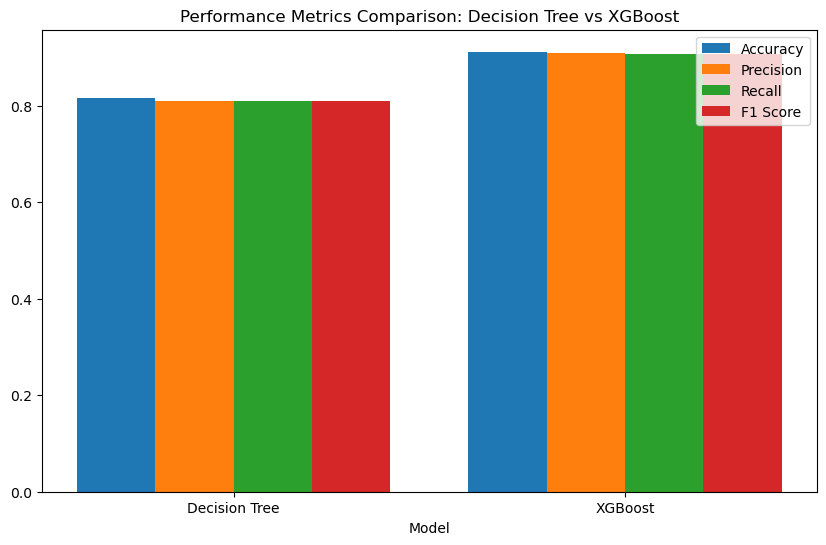

In [103]:
# Preparing data for the comparison bar graph

models = ['Decision Tree', 'catBoost']
accuracy = [accuracy_score(Y_Test, Y_Pred1), accuracy_score(Y_Test, Y_Pred2)]
precision = [precision_score(Y_Test, Y_Pred1, average='macro'), precision_score(Y_Test, Y_Pred2, average='macro')]
recall = [recall_score(Y_Test, Y_Pred1, average='macro'), recall_score(Y_Test, Y_Pred2, average='macro')]
f1 = [f1_score(Y_Test, Y_Pred1, average='macro'), f1_score(Y_Test, Y_Pred2, average='macro')]

# Setting up the bar width and positions
bar_width = 0.2
x = np.arange(len(models))

# Plotting the bar graphs
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each metric
ax.bar(x - 1.5 * bar_width, accuracy, bar_width, label='Accuracy')
ax.bar(x - 0.5 * bar_width, precision, bar_width, label='Precision')
ax.bar(x + 0.5 * bar_width, recall, bar_width, label='Recall')
ax.bar(x + 1.5 * bar_width, f1, bar_width, label='F1 Score')

# Adding labels and titles
ax.set_xlabel('Model')
ax.set_title('Performance Metrics Comparison: Decision Tree vs catBoost')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()